In [2]:
import os
import json 
import pandas as pd
from glob import glob

def stats(dir):
    sub_directory = list(glob(dir))

    all_latency = []
    all_metrics = []
    
    for sub in sub_directory:    
        dataset = sub.split('/')[2].split('__')[0]

        with open (sub + 'latency_stats.json') as file:
            latency_stats = json.loads(file.read())

        with open (sub + 'metrics_stats.json') as file:
            metrics_stats = json.loads(file.read())   

        all_latency.append(pd.Series(latency_stats).to_frame('latency_stats_' + dataset))
        all_metrics.append(pd.Series(metrics_stats).to_frame('metrics_stats_' + dataset))
    return pd.concat(all_latency, axis=1), pd.concat(all_metrics, axis=1)

In [40]:
import pandas as pd 

churn_df = pd.read_csv('./data/Churn.csv', encoding='utf-8')
insurance_df = pd.read_csv('./data/insurance.csv', encoding='utf-8')
#sales_df = pd.read_csv('./data/sales.csv', encoding='utf-8')
diabetes_df = pd.read_csv('./data/diabetes.csv', encoding='utf-8')
clv_df = pd.read_csv('./data/clv.csv', encoding='utf-8')

print(churn_df.shape)
print(insurance_df.shape)
#print(sales_df.shape)
print(diabetes_df.shape)
print(clv_df.shape)


(6499, 21)
(1338, 7)
(768, 9)
(9134, 24)


In [3]:
!ls -ltr ./temp1/Churn__1_Serial__outputs/

total 122
-rw-r--r-- 1 ullal.m users  385 Apr 11 19:37 latency_stats.json
-rw-r--r-- 1 ullal.m users  407 Apr 11 19:37 metrics_stats.json
-rw-r--r-- 1 ullal.m users 1839 Apr 11 19:37 Churn.log


In [4]:
# conda global version 
dir = './temp1/*/'

all_latency1, all_metrics1 = stats(dir)

In [5]:
all_latency1.index = ['Linear Regression', 'Linear Regression (O)', 'Ridge Regression', 'Linear Regression (SK)', 'PCA', 'SVD']
all_latency1.columns = ['Insurance', 'CLV', 'Churn', 'Diabetes', 'Sales']
all_latency1

,Insurance,CLV,Churn,Diabetes,Sales
Linear Regression,0.001052,0.004636,0.232777,0.000622,0.001659
Linear Regression (O),0.001811,0.005825,0.236855,0.000992,0.002504
Ridge Regression,0.000513,0.001037,0.019300,0.000471,0.000596
Linear Regression (SK),0.003289,0.005042,0.305125,0.002890,0.003100
PCA,0.000993,0.004086,0.034784,0.059006,0.001340
SVD,0.000921,0.004114,0.009166,0.001222,0.001176


In [6]:
all_metrics1.index = ['LR_MSE', 'LR_R2_score', 'RR_MSE', 'RR_R2_score', 'SK_LR_MSE', 'SK_LR_R2_score']
all_metrics1.columns = ['Insurance', 'CLV', 'Churn', 'Diabetes', 'Sales']
all_metrics1

,Insurance,CLV,Churn,Diabetes,Sales
LR_MSE,3.659232e+07,530.364648,0.137692,0.190051,0.217234
LR_R2_score,7.395338e-01,0.723483,0.254473,0.212351,0.344525
RR_MSE,3.636297e+07,515.014368,0.135447,0.168784,0.082981
RR_R2_score,7.411663e-01,0.731487,0.266632,0.300489,0.749617
SK_LR_MSE,3.634341e+07,514.658041,0.135429,0.169522,0.083310
SK_LR_R2_score,7.413056e-01,0.731672,0.266729,0.297430,0.748623


In [7]:
!ls -ltr ./temp2/Churn__1_Serial__outputs/

total 122
-rw-r--r-- 1 ullal.m users  391 Apr 11 19:39 latency_stats.json
-rw-r--r-- 1 ullal.m users  408 Apr 11 19:39 metrics_stats.json
-rw-r--r-- 1 ullal.m users 1839 Apr 11 19:39 Churn.log


In [8]:
# conda local version 
dir = './temp2/*/'
all_latency2, all_metrics2 = stats(dir)

In [10]:
all_latency2.index = ['Linear Regression', 'Linear Regression (O)', 'Ridge Regression', 'Linear Regression (SK)', 'PCA', 'SVD']
all_latency2.columns = ['Insurance', 'CLV', 'Churn', 'Diabetes', 'Sales']
all_latency2

,Insurance,CLV,Churn,Diabetes,Sales
Linear Regression,0.000953,0.005070,0.010270,0.000706,0.001694
Linear Regression (O),0.001612,0.006438,0.011820,0.001098,0.002567
Ridge Regression,0.000478,0.001078,0.002444,0.000470,0.000597
Linear Regression (SK),0.002809,0.006566,0.010223,0.002845,0.003170
PCA,0.000839,0.006922,0.003023,0.000627,0.001328
SVD,0.000785,0.003830,0.004267,0.000640,0.001206


In [11]:
all_metrics2.index = ['LR_MSE', 'LR_R2_score', 'RR_MSE', 'RR_R2_score', 'SK_LR_MSE', 'SK_LR_R2_score']
all_metrics2.columns = ['Insurance', 'CLV', 'Churn', 'Diabetes', 'Sales']
all_metrics2

,Insurance,CLV,Churn,Diabetes,Sales
LR_MSE,4.010553e+07,549.251986,0.137740,0.182624,0.230385
LR_R2_score,7.290967e-01,0.716688,0.240132,0.194597,0.376140
RR_MSE,4.011137e+07,537.095800,0.134518,0.177249,0.082653
RR_R2_score,7.290572e-01,0.722958,0.257907,0.218305,0.776185
SK_LR_MSE,4.017724e+07,536.749618,0.134524,0.179773,0.082131
SK_LR_R2_score,7.286123e-01,0.723137,0.257878,0.207171,0.777598


In [23]:
print(len(x2))

6


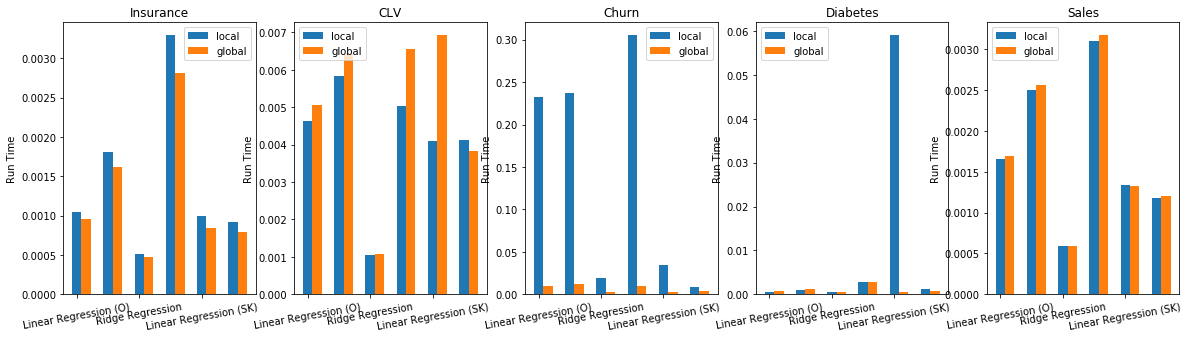

In [31]:
import matplotlib.pyplot as plt
import numpy as np

datasets = list(all_metrics2.columns)

_, ax = plt.subplots(1,5, figsize=(20,5))

x1 = list(all_latency1.index)
x2 = np.arange(len(x1))

for i, dataset in enumerate(datasets):
    column = dataset
    y1 = list(all_latency1[column])
    y2 = list(all_latency2[column])

    ax[i].bar(x2,y1, width=0.3, label = 'local')    
    ax[i].bar(x2+0.3,y2, width=0.3, label = 'global')
    ax[i].set_xticklabels(x1, rotation=10)
    ax[i].set_ylabel('Run Time')
    ax[i].legend()
    ax[i].title.set_text(dataset)
    
plt.show()